# Projek Akhir Kecerdasan Buatan | Kelompok 2 - A2
## Klasifikasi Pizza or Not Pizza
### Nama:
#### - Agditha Evalyn Lolongan (2109106030) 
#### - Ibnu Yafi Arya Wardana (2109106039)
#### - Novia Indah Ramadhani (2109106041)
### Link Dataset : https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza

## Import Library

In [144]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os # Buat komen ky cmd
import shutil # Buat copas 
import random
import tensorflow_datasets as tfds

## Data Collecting

In [145]:
#root_path = r'C:\Users\ASUS\venv_A2-21\Novia_041\PA_KB_BANGET\files'
#source_path = r'C:\Users\ASUS\venv_A2-21\Novia_041\PA_KB_BANGET\files\pizza_not_pizza'

root_path = r'D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\pa'
source_path = r'D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\pa\pizza_not_pizza'

destination = os.path.join(root_path, 'data_used')

In [146]:
# Cek jumlah data pada folder
folders = {}

for folder in os.listdir(source_path):
    folders[folder] = len(os.listdir(os.path.join(source_path, folder)))
    
print(f'Total Images: {folders}')

Total Images: {'not_pizza': 922, 'pizza': 900}


In [147]:
# Buat folder baru
# Cek dulu udah ad atau belum
if os.path.isdir(os.path.join(destination, 'training')):
    print(f"path {os.path.join(destination, 'training')} sudah ada")
    
else:
    os.makedirs(os.path.join(destination, 'training'))
    for kelas in folders.keys():
        os.makedirs(os.path.join(destination, f'training/{kelas}'))
            
            
            
if os.path.isdir(os.path.join(destination, 'validation')):
    print(f"path {os.path.join(destination, 'validation')} sudah ada")
    
else:
    os.makedirs(os.path.join(destination, 'validation'))
    for kelas in folders.keys():
        os.makedirs(os.path.join(destination, f'validation/{kelas}'))

path D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\pa\data_used\training sudah ada
path D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\pa\data_used\validation sudah ada


In [148]:
files_pizza = []
files_not_pizza = []

#Cek data corrupt yg uk = 0
for file in os.listdir(os.path.join(source_path, "Pizza")):
    if os.path.getsize(os.path.join(source_path, f'Pizza/{file}')):
        files_pizza.append(file)
    else:
        print(f'{file} dilewati')
        

        
for file in os.listdir(os.path.join(source_path, "Not_Pizza")):
    if os.path.getsize(os.path.join(source_path, f'Not_Pizza/{file}')):
        files_not_pizza.append(file)
    else:
        print(f'{file} dilewati')

## Data Preprocessing

In [149]:
files_pizza = random.sample(files_pizza, len(files_pizza))
files_not_pizza = random.sample(files_not_pizza, len(files_not_pizza))

def bagi(listnya, potongnya):
    return int(-len(listnya) * potongnya)


# CAra bagi
files_pizza_training = files_pizza[:bagi(files_pizza, 0.2)]
files_not_pizza_training = files_not_pizza[:bagi(files_not_pizza, 0.2)]
files_pizza_validation = files_pizza[bagi(files_pizza, 0.2):]
files_not_pizza_validation = files_not_pizza[bagi(files_not_pizza, 0.2):]

In [150]:
for file in files_pizza_training:
    shutil.copyfile(
    os.path.join(source_path, f'pizza/{file}'),
        os.path.join(destination, f'training/pizza/{file}')
    )
    
for file in files_not_pizza_training:
    shutil.copyfile(
    os.path.join(source_path, f'not_pizza/{file}'),
        os.path.join(destination, f'training/not_pizza/{file}')
    )

for file in files_pizza_validation:
    shutil.copyfile(
    os.path.join(source_path, f'pizza/{file}'),
        os.path.join(destination, f'validation/pizza/{file}')
    )
    
for file in files_not_pizza_validation:
    shutil.copyfile(
    os.path.join(source_path, f'not_pizza/{file}'),
        os.path.join(destination, f'validation/not_pizza/{file}')
    )

In [151]:
train_path = os.path.join(destination, 'training')
val_path = os.path.join(destination, 'validation')

In [152]:
# Initialisasi Generator
dgen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2,
    fill_mode = 'nearest'
)

# Load Data
targetSize = (100, 100) #Resize


# Training
print("TRAINING")
ds_train = dgen.flow_from_directory(
    train_path,
    target_size = targetSize,
    batch_size = 1,
    shuffle = True,
    seed=0,
    class_mode='categorical',
)

print(" Dengan Shape:", ds_train[0][0].shape)

# Validation
print("\nVALIDATION")
ds_val = dgen.flow_from_directory(
    val_path,
    target_size = targetSize,
    batch_size = 1,
    shuffle = True,
    seed=0,
    class_mode='categorical'
)

print("-- Dengan Shape:", ds_val[0][0].shape)

img_generator = dgen.flow_from_directory(
    source_path,
    target_size = (128, 128),   #Uk Gambar
    batch_size = 16,
    shuffle = True,
    seed=0,
    class_mode = 'categorical',
    save_to_dir = 'Augmented',
    save_format = 'jpg'
)

TRAINING
Found 1822 images belonging to 2 classes.
 Dengan Shape: (1, 100, 100, 3)

VALIDATION
Found 1501 images belonging to 2 classes.
-- Dengan Shape: (1, 100, 100, 3)
Found 1822 images belonging to 2 classes.


### Penjelasan:
- Training -> Menggunakan 1574 images untuk data training
- Validation -> Menggunakan 392 images untuk data validation

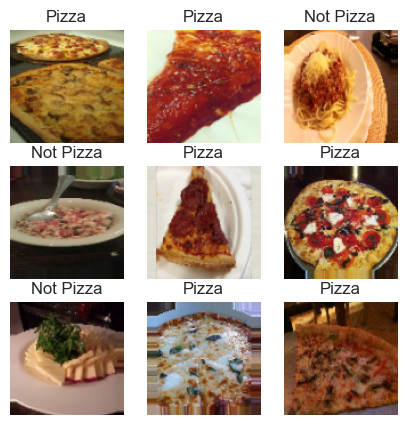

In [153]:
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    img, label = ds_train.next()
    plt.imshow(img[0])
    plt.axis("off")
    plt.title("Pizza" if label[0][0] == 0 else "Not Pizza")
plt.xlabel(" Data Training")
plt.show()

In [154]:
class_names=['not_pizza', 'pizza']

i=1
plt.figure(figsize=(12,7))
for images, labels in ds_train:
    
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])
    
    plt.subplot(3,4,i)
    plt.imshow(image)
    plt.title(f"Class : {class_names[label]}")
    plt.axis('off')
    
    i+=1
    if i>=13:
        break

plt.show()
plt.tight_layout()

In [155]:
img_generator = dgen.flow_from_directory(
    source_path,
    target_size = (128, 128),   #Uk Gambar
    batch_size = 16, 
    shuffle = True, #supaya teacak data gambarnya
    class_mode = 'categorical',
    save_to_dir = 'Augmented',
    save_format = 'jpg'
)

Found 1822 images belonging to 2 classes.


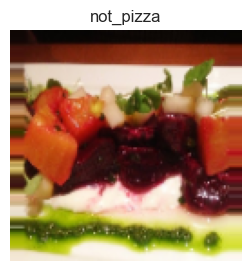

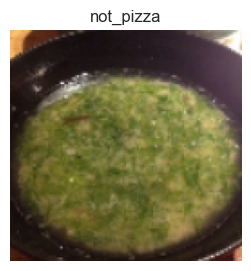

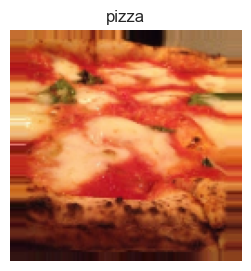

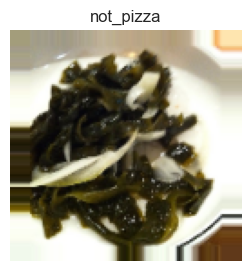

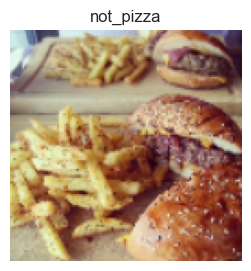

In [156]:
for i in range(5):
    plt.figure(figsize=(6, 3))
    img, label = img_generator.next()
    plt.imshow(img[0])
    plt.title(class_names[tf.argmax(label[0])])
    plt.axis('off')
    plt.show()

In [157]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [168]:
model = Sequential()

#INPUT LAYER
# 3 buat warna(?), input_shape only on inputttt
model.add(Conv2D(256, 3, 
            activation='relu',
            input_shape = [100,100,3]))

#HIDDEN LAYER
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

#OUTPUT LAYER
# 5 = class, softmax=banyak class, sigmoid = 2 class
model.add(Dense(2, activation='sigmoid'))

In [169]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [173]:
hasil = model.fit(ds_train,batch_size=32, epochs=5, validation_data=ds_val)

Epoch 1/5
1822/1822 [==============================] - 165s 91ms/step - loss: 0.6935 - accuracy: 0.5011 - val_loss: 0.6930 - val_accuracy: 0.5070
Epoch 2/5
1822/1822 [==============================] - 171s 94ms/step - loss: 0.6935 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 3/5
1822/1822 [==============================] - 172s 94ms/step - loss: 0.6935 - accuracy: 0.4896 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 4/5
1822/1822 [==============================] - 166s 91ms/step - loss: 0.6934 - accuracy: 0.4962 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 5/5
1822/1822 [==============================] - 157s 86ms/step - loss: 0.6936 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5070


In [174]:
evaluasi = model.evaluate(ds_val, verbose=0)
print(f'Akurasi Validation-Set  : {evaluasi[1]}')
print(f'Loss Validation-Set     : {evaluasi[0]}')

Akurasi Validation-Set  : 0.5069953203201294
Loss Validation-Set     : 0.6930621266365051


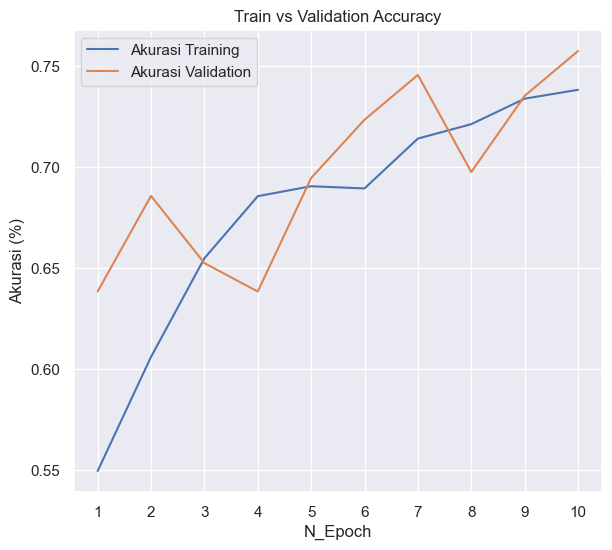

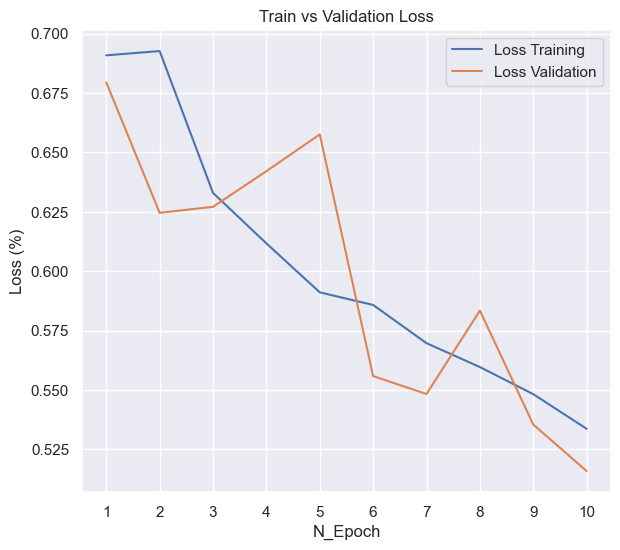

In [ ]:
import seaborn as sns

epochs = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(15,6))

#--------------------------------Subplot Akurasi--------------------------------
plt.subplot(1,2,1)
sns.lineplot(
    x=epochs, 
    y=hasil.history['accuracy'], 
    label= 'Akurasi Training'
)
sns.lineplot(
    x=epochs, 
    y=hasil.history['val_accuracy'], 
    label= 'Akurasi Validation'
)

plt.xticks(epochs)
plt.ylabel('Akurasi (%)')
plt.xlabel('N_Epoch')
plt.title('Train vs Validation Accuracy')

plt.show()


#--------------------------------Subplot Loss--------------------------------
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.lineplot(
    x=epochs, 
    y=hasil.history['loss'], 
    label= 'Loss Training'
)
sns.lineplot(
    x=epochs, 
    y=hasil.history['val_loss'], 
    label= 'Loss Validation'
)

plt.xticks(epochs)
plt.ylabel('Loss (%)')
plt.xlabel('N_Epoch')
plt.title('Train vs Validation Loss')

plt.show()